# Neural Networks in Pytorch

**Note:** The data used in this notebook is tabular data with shape -> (124689, 5) 

**Neural Network:** A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates.

Neural networks are composed of various components like an input layer, hidden layers, an output layer and many nodes in each layer.

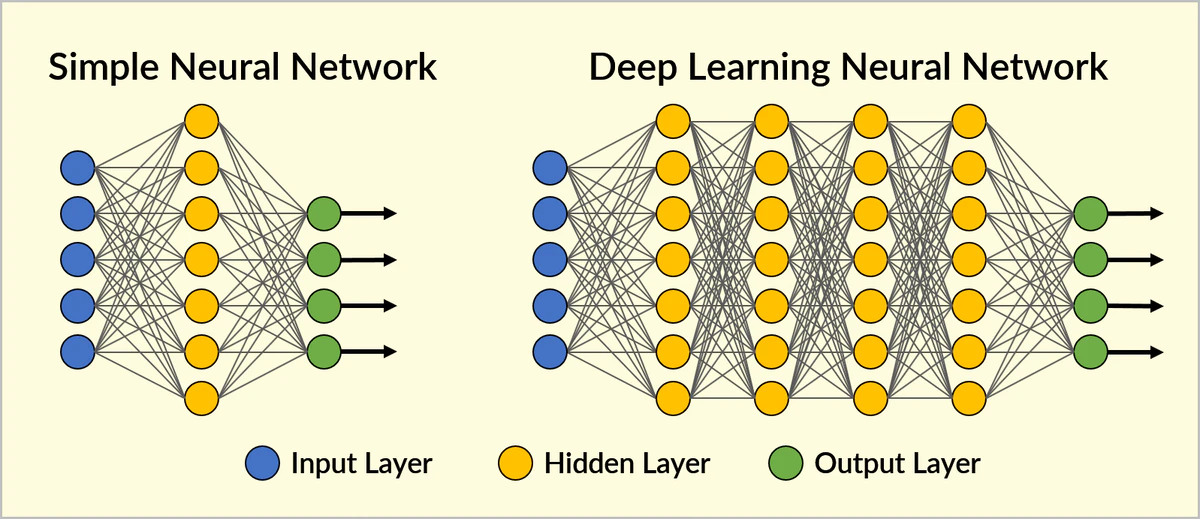

**Simple Neural Network:** We call a neural net Simple/Shallow when there is only one Hidden layer between input and output layers.

**Deep Neural Network(DNN):** As opposed to that we call a network deep only when the number of Hidden layers are 2 or more.

The main explanation is that the deep models are able to extract/build better features than shallow models and to achieve this they make use of many intermediate hidden layers.

For more explaination on this click [here](https://www.quora.com/How-does-deep-learning-work-and-how-is-it-different-from-normal-neural-networks-applied-with-SVM-How-does-one-go-about-starting-to-understand-them-papers-blogs-articles)

In [ ]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("../input/weather-dataset-rattle-package/weatherAUS.csv")

# Quick data preprocessing

In [ ]:
df = df[['Rainfall','Humidity3pm','RainToday','Pressure9am','RainTomorrow']]
df = df.dropna(how = 'any')
df.shape

In [ ]:
df.isna().sum()

In [ ]:
df.RainToday[df.RainToday == 'Yes'] = 1 
df.RainToday[df.RainToday == 'No'] = 0
df.RainToday = pd.to_numeric(df.RainToday)
df.RainTomorrow[df.RainTomorrow == 'Yes'] = 1
df.RainTomorrow[df.RainTomorrow == 'No'] = 0
df.RainTomorrow = pd.to_numeric(df.RainTomorrow)
df.info()

# Dataset Formation (Train-Test) in Tensors

In [ ]:
Y, X = df[['RainTomorrow']], df.drop('RainTomorrow', axis = 1, inplace = False)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
# input must be numeric
Xtrain = torch.from_numpy(Xtrain.to_numpy()).float()
Xtest = torch.from_numpy(Xtest.to_numpy()).float()
Ytrain = torch.from_numpy(Ytrain.to_numpy()).float()
Ytest = torch.squeeze(torch.from_numpy(Ytest.to_numpy()).float())

print(Xtrain.shape, Xtest.shape)
print(Ytrain.shape, Ytest.shape)

print("Ytrain give one extra dimention ie ",Ytrain.shape)

In [ ]:
print(Ytrain, Ytest)

print("So use squeeze funtion to remove the extra demention!!! ")

Ytrain = torch.squeeze(Ytrain)
print(Ytrain.shape)

# Neural Network Model Building

In PyTorch you define your Models as subclasses of **torch.nn.Module.**

In the **__init__** function, you are supposed to initialize the layers you want to use. Unlike keras, Pytorch goes more low level and you have to specify the sizes of your network so that everything matches.

In the forward method, you specify the connections of your layers. This means that you will use the layers you already initialized, in order to re-use the same layer for each forward pass of data you make.

torch.nn.Functional contains some useful functions like activation functions a convolution operations you can use. However, these are not full layers so if you want to specify a layer of any kind you should use torch.nn.Module.

You would use the torch.nn.Functional conv operations to define a custom layer for example with a convolution operation, but not to define a standard convolution layer.


In [ ]:
class Net(nn.Module):    # class Net will be the subclass of torch.nn.Module ie Class Net --EXTENDS--> Class nn.Module
    def __init__(self, n_features):    # initialize the layers you want to use in this function/method
        super(Net, self).__init__()    # call to init method of superclass ie nn.Module
        self.fc1 = nn.Linear(n_features, 5)    # Input Layer of n_features input nodes to 5 outputs
        self.fc2 = nn.Linear(5, 3)             # 1st Hidden Layer of 5 nodes to 3 outputs
        self.fc3 = nn.Linear(3, 1)             # 2st Hidden Layer of 3 nodes to 1 output
    
    def forward(self, x):              # Feed Forward
        x = F.relu(self.fc1(x))        # torch.nn.functional.relu() ie a Activation Function 
        x = F.relu(self.fc2(x))
        return torch.sigmoid(self.fc3(x))  # Output sigmoid activation function

**Activation Functions:** 
In neural networks, activation functions perform a transformation on a weighted sum of inputs plus biases to a neuron in order to compute its output.
In simple words Activation functions are mathematical equations that determine the output of a neural network. The function is attached to each neuron in the network, and determines whether it should be activated (“fired”) or not, based on whether each neuron's input is relevant for the model's prediction.

A Detailed Separate Notebook will be provided by me on this topic!!!

In [ ]:
net = Net(Xtrain.shape[1])
net

# Our Neural Network with code reference

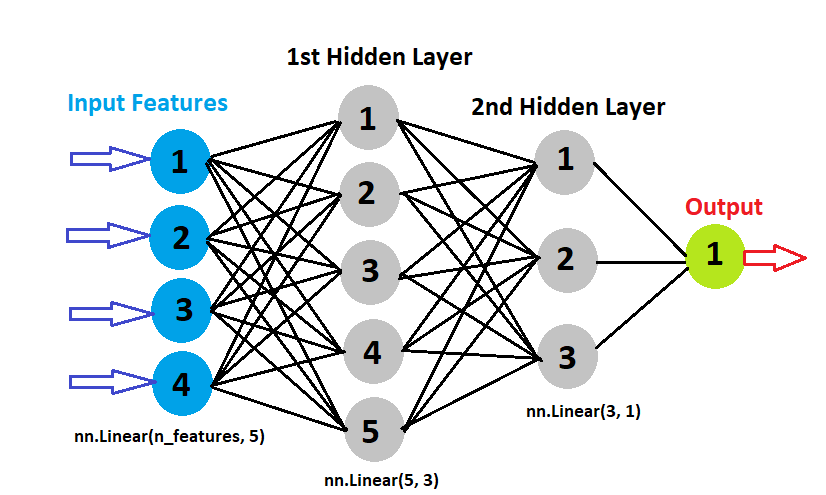

# Loss Functions

Machines learn by means of a loss function. It’s a method of evaluating how well specific algorithm models the given data. If predictions deviates too much from actual results, loss function would cough up a very large number. 

torch.nn.BCELoss() Creates a criterion that measures the Binary Cross Entropy between the target and the output.

Separate Notebook will be provided on this topic soon!!!

Gradually, with the help of some optimization function, loss function learns to reduce the error in prediction.

In [ ]:
criterion = nn.BCELoss()
print(net.parameters())

# Optimizers

Rather than manually updating the weights of the model as we have been doing, we use the optim package to define an Optimizer that will update the weights for us. The optim package defines many optimization algorithms that are commonly used for deep learning, including SGD+momentum, RMSProp, Adam, etc.

More detailed notebook will be provided on this soon!!!

In [ ]:
optimizer = torch.optim.Adam(net.parameters(), lr = 0.001)   # lr: learning rate for the model

# Things to run the model on **GPU** or Default CPU

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print("Device Selected: ", device)

if device.type == 'cuda':
    print("Device Detailes: ", torch.cuda.get_device_properties(0))

In [ ]:
# Set all the tensors to gpu device if cuda is enable
Xtrain = Xtrain.to(device)
Xtest = Xtest.to(device)
Ytrain = Ytrain.to(device)
Ytest = Ytest.to(device)

# Now set our Net model and criterion to gpu device
net = net.to(device)
criterion = criterion.to(device)

In [ ]:
# Check if the abouve tensors are loaded on the GPU memory or not
if 'cuda' in device.type:
    print("While runing this notebook my gpu memory was 16280 MiB")
    print("and almost 700 to 900 Mib has been taken by above tensors ie Xtrain, Xtest, Ytrain and Ytest\n")
    
    !nvidia-smi

    print("So this shows that our gpu works fine with torch!")

else: print("This block wont run if you donot have gpu!!!")

# Forecasting / Predictions by our NN model

In [ ]:
def calculate_accuracy(y_true, y_pred):
    predicted = y_pred.ge(.5).view(-1)
    return (y_true == predicted).sum().float() / len(y_true)

def round_tensor(t, decimal_places = 6):
    return round(t.item(), decimal_places)

for epoch in range(0, 1000):
    y_pred = net(Xtrain)
    
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, Ytrain)
    
    if epoch % 100 == 0:
        train_acc = calculate_accuracy(Ytrain, y_pred)

        y_test_pred = net(Xtest)
        y_test_pred = torch.squeeze(y_test_pred)

        test_loss = criterion(y_test_pred, Ytest)

        test_acc = calculate_accuracy(Ytest, y_test_pred)
        print(f'''epoch {epoch}
            Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
            Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}''')
        
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

In [ ]:
try:
    5 / 0
except Exception as e: print(e)

# Saving and Loading of Pytorch Model

In [ ]:
MODEL_PATH = 'model1.pth'

torch.save(net, MODEL_PATH)

In [ ]:
net = torch.load(MODEL_PATH)

# Evaluation of the model

In [ ]:
classes = ['No rain', 'Rain']

y_pred = net(Xtest)
y_pred

In [ ]:
# Convert the probabilities to binary classes ie (1 or 0) and (True or False) by the help of threshold values
y_pred = y_pred.ge(.5).view(-1).cpu()
y_pred

In [ ]:
Ytest = Ytest.cpu()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Ytest, y_pred, target_names = classes))

# Making Predictions in terms of production

In [ ]:
def will_it_rain(rainfall, humidity, rain_today, pressure):
    t = torch.as_tensor([rainfall, humidity, rain_today, pressure]).float().to(device)
    output = net(t)
    return output.ge(.5).item()

print("A Function is defined to make single or bulk predictions which can be used for the real world productions too!")

In [ ]:
# Try 1
will_it_rain(10, 10, True, 2)

In [ ]:
# Try 2
will_it_rain(0, 1, False, 100)

## References 
https://youtu.be/O2ZNjOBPF4M

https://pytorch.org/docs/stable/nn.html#

https://github.com/curiousily/Getting-Things-Done-with-Pytorch/blob/master/04.first-neural-network.ipynb